# Customer Retention & Cohort Analysis

This notebook cleans the dataset, builds monthly cohorts, calculates retention, and exports charts and tables for your mini-report.


In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [11]:
#importing dataset
file_path = r"C:\Users\opeye\OneDrive\My Amdari internship\E-Commerce Cohort Analysis\Dataset_ecommerce.xlsx"

Ecommerce = pd.read_excel(file_path)

# Preview the first 5 rows
print(Ecommerce.head())



  InvoiceNo         InvoiceDate  CustomerID StockCode  Description  Quantity  \
0    536365 2010-12-01 08:26:00     17850.0    SC1734  Electronics        65   
1    536365 2010-12-01 08:26:00     17850.0    SC2088    Furniture        95   
2    536365 2010-12-01 08:26:00     17850.0    SC3463        Books        78   
3    536365 2010-12-01 08:26:00     17850.0    SC6228         Toys        15   
4    536365 2010-12-01 08:26:00     17850.0    SC2149         Toys        50   

   UnitPrice       Country  
0      10.23         Egypt  
1      19.61          Mali  
2      61.49          Mali  
3      24.73  South Africa  
4      38.83        Rwanda  


In [12]:
Ecommerce.head()


,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [14]:
Ecommerce.tail()


,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal
541908,581587,2011-12-09 12:50:00,12680.0,SC9276,Toys,6,46.62,Ethiopia


In [15]:
#Viewing the rows and features
Ecommerce.shape

(541909, 8)

In [16]:
#viewing the summary of the dataframe
Ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   InvoiceDate  541909 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    541909 non-null  object        
 4   Description  541909 non-null  object        
 5   Quantity     541909 non-null  int64         
 6   UnitPrice    541909 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [17]:
#checking the null values of each feature
Ecommerce.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [19]:
#drop null value
Ecommerce = Ecommerce.dropna(subset=['CustomerID'])

In [20]:
#checking the null values of each feature again
Ecommerce.isnull().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [21]:
Ecommerce.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [22]:
Ecommerce['CustomerID']=Ecommerce['CustomerID'].astype(int).astype(str)

In [24]:
Ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  object        
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [33]:
numb_customers = Ecommerce['CustomerID'].nunique()
numb_transactions = Ecommerce['InvoiceNo'].nunique()
numb_products = Ecommerce['StockCode'].nunique()



In [27]:
print(f'Number of unique customers {numb_customers}')
print(f'Number of Transactions {numb_transactions}')
print(f'Number of Products {numb_products}')



Number of unique customers 4372
Number of Transactions 22190
Number of Products 9000


In [30]:
date_range = (Ecommerce['InvoiceDate'].min(), Ecommerce['InvoiceDate'].max())


In [32]:
print(f' Transaction Period: {date_range[0], {date_range[1]}}')

 Transaction Period: (Timestamp('2010-12-01 08:26:00'), {Timestamp('2011-12-09 12:50:00')})


In [35]:
print(f"Rows with negative quantity: {(Ecommerce['Quantity'] <= 0).sum()}")


Rows with negative quantity: 0


In [36]:
print(f"Rows with negative UnitPrice : {(Ecommerce['UnitPrice'] <= 0).sum()}")


Rows with negative UnitPrice : 0


In [38]:
top_countries = Ecommerce.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).head()

In [39]:
print(top_countries)

Country
Mozambique      3072
Benin           3054
Togo            3053
Nigeria         3051
Burkina Faso    3049
Name: CustomerID, dtype: int64


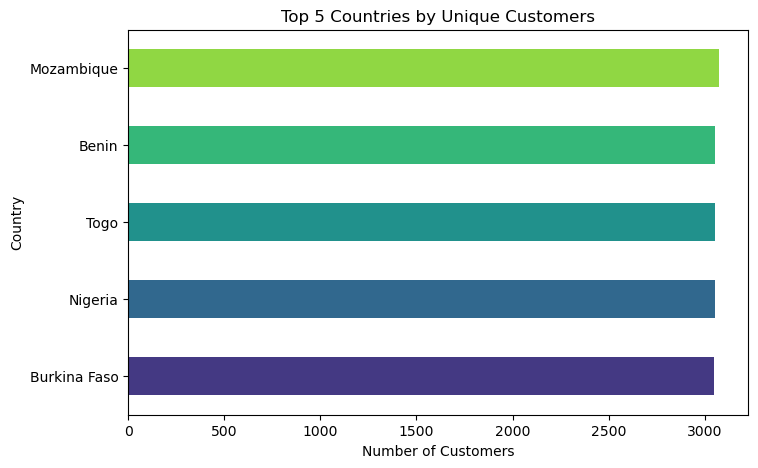

In [44]:

top_countries = (
    Ecommerce.groupby('Country')['CustomerID']
    .nunique()
    .sort_values(ascending=False)
    .head()
)

colors = sns.color_palette("viridis", len(top_countries))

# Reverse the order so the largest is at the top
top_countries[::-1].plot(kind='barh', figsize=(8,5), color=colors)

plt.title("Top 5 Countries by Unique Customers")
plt.xlabel("Number of Customers")
plt.ylabel("Country")
plt.show()


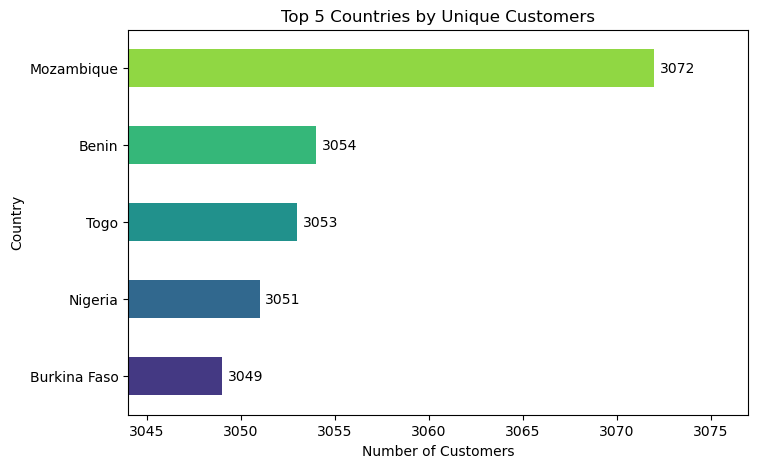

In [43]:

import matplotlib.pyplot as plt
import seaborn as sns

top_countries = (
    Ecommerce.groupby('Country')['CustomerID']
    .nunique()
    .sort_values(ascending=False)
    .head()
)

colors = sns.color_palette("viridis", len(top_countries))

ax = top_countries[::-1].plot(kind='barh', figsize=(8,5), color=colors)  # reverse order
plt.title("Top 5 Countries by Unique Customers")
plt.xlabel("Number of Customers")
plt.ylabel("Country")

# Zoom in on x-axis
plt.xlim(top_countries.min() - 5, top_countries.max() + 5)

# Add labels on bars
for i, v in enumerate(top_countries[::-1]):
    plt.text(v + 0.3, i, str(v), va='center')

plt.show()


In [46]:
Ecommerce['InvoiceMonth'] = Ecommerce['InvoiceDate'].dt.to_period('M')

In [47]:
Ecommerce['Revenue'] = Ecommerce['Quantity'] * Ecommerce['UnitPrice'] 

In [152]:
Ecommerce['InvoiceDate'] = pd.to_datetime(Ecommerce['InvoiceDate'], errors='coerce')
Ecommerce['Quantity']    = pd.to_numeric(Ecommerce['Quantity'], errors='coerce')
Ecommerce['UnitPrice']   = pd.to_numeric(Ecommerce['UnitPrice'], errors='coerce')

Ecommerce['Revenue'] = Ecommerce['Quantity'] * Ecommerce['UnitPrice']


In [153]:
Ecommerce.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Revenue,CohortMonth_x,CohortMonth_y,CohortMonth,CohortIndex
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,2010-12-01,664.95,2010-12,2010-12,2010-12-01,1
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,2010-12-01,1862.95,2010-12,2010-12,2010-12-01,1
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,2010-12-01,4796.22,2010-12,2010-12,2010-12-01,1
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,2010-12-01,370.95,2010-12,2010-12,2010-12-01,1
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,2010-12-01,1941.50,2010-12,2010-12,2010-12-01,1


In [154]:
# no infinities / NaNs in revenue
import numpy as np
print('Revenue dtype:', Ecommerce['Revenue'].dtype)
print('NaNs:', Ecommerce['Revenue'].isna().sum(), ' Infs:', np.isinf(Ecommerce['Revenue']).sum())
print(Ecommerce[['Quantity','UnitPrice','Revenue']].describe())


Revenue dtype: float64
NaNs: 0  Infs: 0
            Quantity      UnitPrice        Revenue
count  406829.000000  406829.000000  406829.000000
mean       50.478471      50.477654    2550.053514
std        28.872921      28.573075    2211.425935
min         1.000000       1.000000       1.000000
25%        25.000000      25.710000     723.840000
50%        50.000000      50.430000    1914.870000
75%        75.000000      75.170000    3885.120000
max       100.000000     100.000000    9999.000000


In [155]:
monthly_sales = Ecommerce.groupby('InvoiceMonth')['Revenue'].sum().reset_index()

In [156]:
monthly_sales

,InvoiceMonth,Revenue
0,2010-12-01,6.792367e+07
1,2011-01-01,5.582933e+07
2,2011-02-01,5.208536e+07
3,2011-03-01,7.137210e+07
4,2011-04-01,5.914003e+07
5,2011-05-01,7.434151e+07
6,2011-06-01,7.109639e+07
7,2011-07-01,7.040789e+07
8,2011-08-01,6.994326e+07
9,2011-09-01,1.036281e+08


In [157]:
monthly_sales['InvoiceMonth'] = monthly_sales['InvoiceMonth'].astype(str)

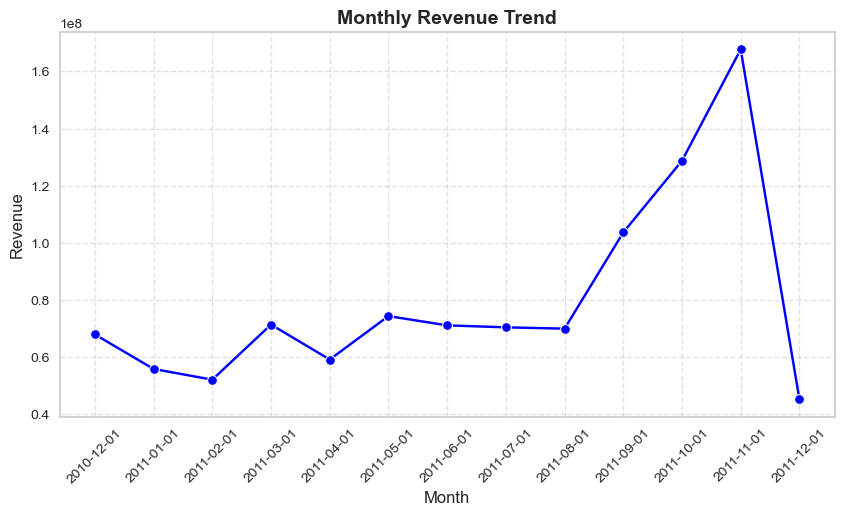

In [158]:


plt.figure(figsize=(10,5))  # wider for readability
sns.lineplot(
    x="InvoiceMonth",
    y="Revenue",
    data=monthly_sales,
    marker="o",
    color="blue"
)

plt.title("Monthly Revenue Trend", fontsize=14, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)  # rotate labels if dates overlap
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


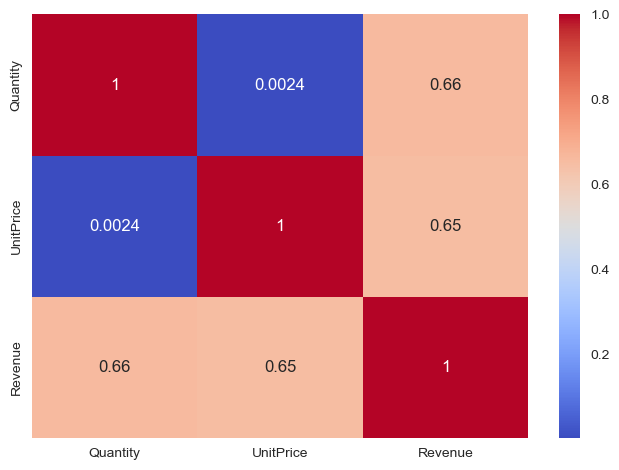

In [159]:
import seaborn as sns

sns.heatmap(Ecommerce[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.show()


In [160]:
Ecommerce.groupby("Description")["Revenue"].sum().sort_values(ascending=False).head(10)
Ecommerce.groupby("Country")["Revenue"].sum().sort_values(ascending=False).head(10)


Country
Libya           37690362.35
Somalia         37663830.57
Togo            37592496.96
Mali            37508467.02
Ghana           37414593.40
Nigeria         37364243.60
Ethiopia        37228695.13
Mozambique      37145464.36
Sierra Leone    37140824.43
Algeria         37140683.52
Name: Revenue, dtype: float64

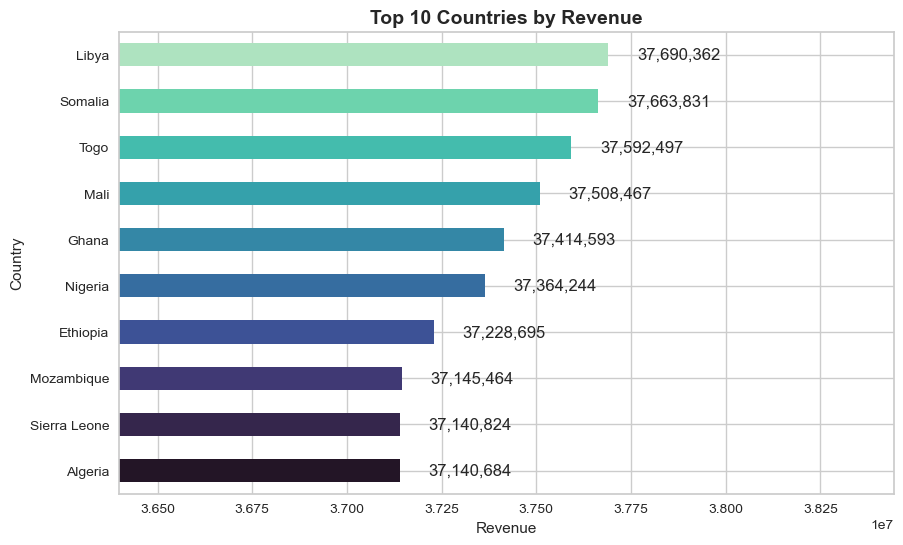

In [161]:


top_countries_revenue = (
    Ecommerce.groupby("Country")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

colors = sns.color_palette("mako", len(top_countries_revenue))

ax = top_countries_revenue[::-1].plot(kind="barh", figsize=(10,6), color=colors)
plt.title("Top 10 Countries by Revenue", fontsize=14, fontweight="bold")
plt.xlabel("Revenue")
plt.ylabel("Country")

# Zoom in on the range
plt.xlim(top_countries_revenue.min() * 0.98, top_countries_revenue.max() * 1.02)

# Add value labels
for i, v in enumerate(top_countries_revenue[::-1]):
    plt.text(v + (top_countries_revenue.max() * 0.002), i, f"{v:,.0f}", va="center")

plt.show()


In [162]:
Ecommerce.groupby("Description")["Revenue"].sum().sort_values(ascending=False).head(10)


Description
Shoes               1.047055e+08
Jewelry             1.042335e+08
Sports Equipment    1.040682e+08
Cloths              1.039723e+08
Furniture           1.039004e+08
Toys                1.038980e+08
Electronics         1.034930e+08
Kitchenware         1.034123e+08
Cosmetics           1.032372e+08
Books               1.025154e+08
Name: Revenue, dtype: float64

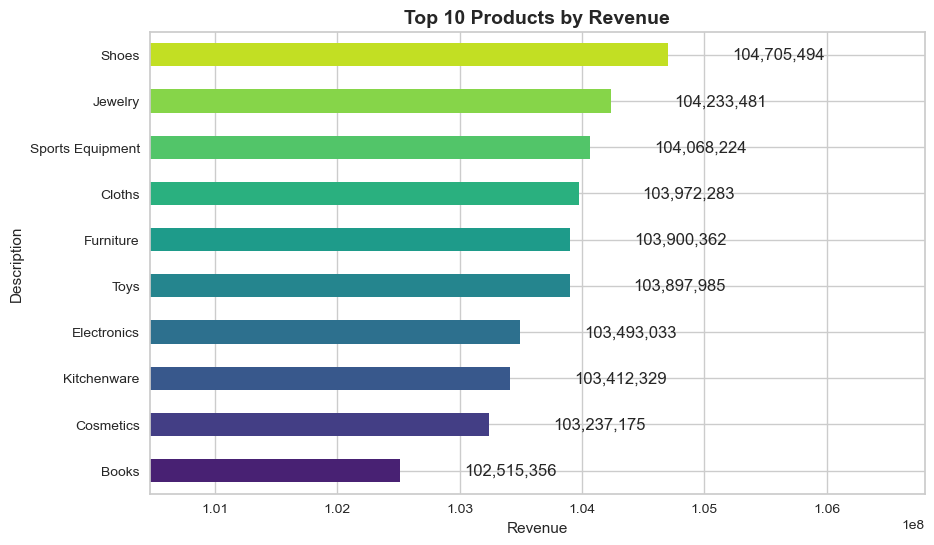

In [163]:
top_products = (
    Ecommerce.groupby("Description")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Choose a color palette
colors = sns.color_palette("viridis", len(top_products))

# Plot with reversed order so biggest is at top
ax = top_products[::-1].plot(kind="barh", figsize=(10,6), color=colors)

plt.title("Top 10 Products by Revenue", fontsize=14, fontweight="bold")
plt.xlabel("Revenue")
plt.ylabel("Description")

# Zoom in to focus on the top_products range
plt.xlim(top_products.min() * 0.98, top_products.max() * 1.02)

# Add value labels on bars
for i, v in enumerate(top_products[::-1]):
    plt.text(v + (top_products.max() * 0.005), i, f"{v:,.0f}", va='center')

plt.show()


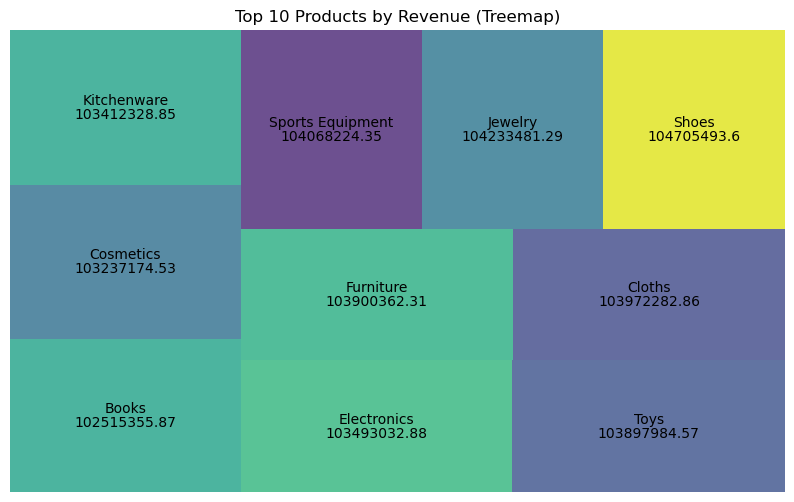

In [86]:
import squarify

top_products = top_products.sort_values(ascending=True)  # squarify needs ascending order

plt.figure(figsize=(10,6))
squarify.plot(
    sizes=top_products.values,
    label=top_products.index,
    value=top_products.values,
    alpha=0.8
)
plt.title("Top 10 Products by Revenue (Treemap)")
plt.axis("off")
plt.show()


In [84]:
pip install squarify


  Obtaining dependency information for squarify from https://files.pythonhosted.org/packages/b7/3c/eedbe9fb07cc20fd9a8423da14b03bc270d0570b3ba9174a4497156a2152/squarify-0.4.4-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#COHORT ANALYSIS

In [164]:
cohort_data = Ecommerce.groupby('CustomerID')['InvoiceMonth'].min()

In [165]:
cohort_data.name = 'CohortMonth'

In [166]:
cohort_data

CustomerID
12346   2011-01-01
12347   2010-12-01
12348   2010-12-01
12349   2011-11-01
12350   2011-02-01
           ...    
18280   2011-03-01
18281   2011-06-01
18282   2011-08-01
18283   2011-01-01
18287   2011-05-01
Name: CohortMonth, Length: 4372, dtype: datetime64[ns]

Ecommerce = Ecommerce.merge(cohort_data, on='CustomerID')

In [168]:
Ecommerce = Ecommerce.merge(
    cohort_data,
    on='CustomerID',
    how='left',
    suffixes=('', '_cohort')  # keep left names, suffix right overlaps
)


In [169]:
Ecommerce.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Revenue,CohortMonth_x,CohortMonth_y,CohortMonth,CohortIndex,CohortMonth_cohort
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,2010-12-01,664.95,2010-12,2010-12,2010-12-01,1,2010-12-01
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,2010-12-01,1862.95,2010-12,2010-12,2010-12-01,1,2010-12-01
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,2010-12-01,4796.22,2010-12,2010-12,2010-12-01,1,2010-12-01
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,2010-12-01,370.95,2010-12,2010-12,2010-12-01,1,2010-12-01
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,2010-12-01,1941.50,2010-12,2010-12,2010-12-01,1,2010-12-01


In [170]:
invoice_year, invoice_month = Ecommerce['InvoiceMonth'].dt.year, Ecommerce['InvoiceMonth'].dt.month
cohort_year, cohort_month = Ecommerce['CohortMonth'].dt.year, Ecommerce['CohortMonth'].dt.month

In [171]:
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

In [172]:
Ecommerce['CohortIndex'] = year_diff * 12 + month_diff + 1
Ecommerce.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Revenue,CohortMonth_x,CohortMonth_y,CohortMonth,CohortIndex,CohortMonth_cohort
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,2010-12-01,664.95,2010-12,2010-12,2010-12-01,1,2010-12-01
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,2010-12-01,1862.95,2010-12,2010-12,2010-12-01,1,2010-12-01
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,2010-12-01,4796.22,2010-12,2010-12,2010-12-01,1,2010-12-01
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,2010-12-01,370.95,2010-12,2010-12,2010-12-01,1,2010-12-01
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,2010-12-01,1941.50,2010-12,2010-12,2010-12-01,1,2010-12-01


In [173]:
cohort_counts = Ecommerce.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()
cohort_pivot = cohort_counts.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

In [174]:
cohort_pivot

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
cohort_size = cohort_pivot.iloc[:,0]
retention = cohort_pivot.divide(cohort_size, axis=0).round(3)

In [176]:
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.382,0.334,0.387,0.360,0.397,0.380,0.354,0.354,0.395,0.373,0.50,0.274
2011-01-01,1.0,0.240,0.283,0.242,0.328,0.299,0.261,0.257,0.311,0.347,0.368,0.15,NaN
2011-02-01,1.0,0.247,0.192,0.279,0.268,0.247,0.255,0.282,0.258,0.313,0.092,NaN,NaN
2011-03-01,1.0,0.191,0.255,0.218,0.232,0.177,0.264,0.239,0.289,0.089,NaN,NaN,NaN
2011-04-01,1.0,0.227,0.221,0.211,0.207,0.237,0.231,0.261,0.084,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.237,0.172,0.172,0.215,0.244,0.265,0.104,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.209,0.187,0.272,0.247,0.336,0.102,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.209,0.204,0.230,0.272,0.115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.251,0.251,0.251,0.138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


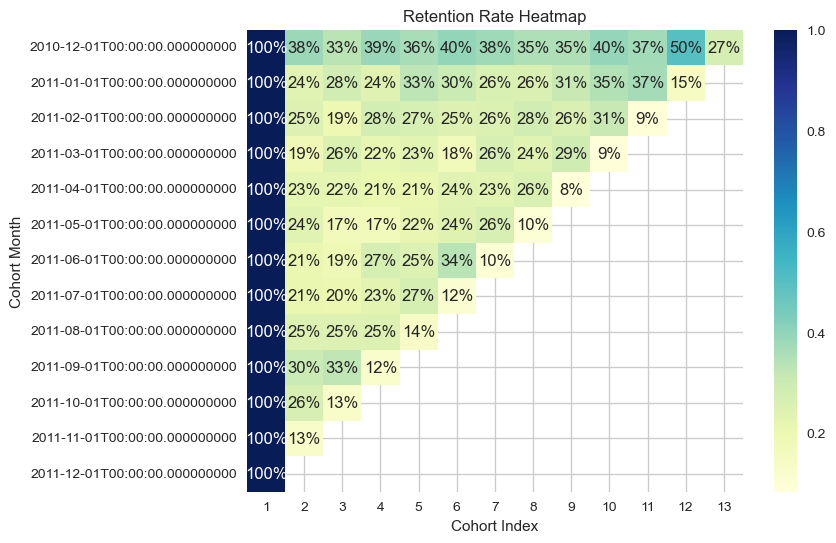

In [177]:
plt.figure(figsize=(8,6))
sns.heatmap(retention, annot=True, fmt=".0%", cmap="YlGnBu")
plt.title("Retention Rate Heatmap")
plt.ylabel("Cohort Month")
plt.xlabel("Cohort Index")
plt.show()


In [178]:
reference_date = Ecommerce['InvoiceDate'].max() + pd.Timedelta(days=1)
reference_date

Timestamp('2011-12-10 12:50:00')

In [198]:
rfm = Ecommerce.groupby('CustomerID').agg(
    recency_days=('InvoiceDate', lambda x: (reference_date - x.max()).days),
    frequency=('InvoiceNo', 'nunique'),
    monetary=('Revenue', 'sum')
).reset_index()


rfm = Ecommerce.groupby('CustomerID').agg({
    'InvoiceDate': lambda x:(reference_date -x.max()).days,
    'InvoiceNo': pd.Series.nunique,
    'Revenue': 'sum'
}).reset_index()

In [199]:
rfm.columns = {'CustomerID','recency_days', 'frequency','monetary'}

In [200]:
rfm.columns = ['CustomerID','InvoiceDate','InvoiceNo','Revenue']
rfm = rfm.rename(columns={
    'InvoiceDate': 'recency_days',
    'InvoiceNo': 'frequency',
    'Revenue': 'monetary'
})


In [201]:
rfm.head()

,CustomerID,recency_days,frequency,monetary
0,12346,326,2,5342.40
1,12347,2,7,431501.00
2,12348,75,4,82378.47
3,12349,19,1,176075.12
4,12350,310,1,48173.37


In [202]:
rfm.describe()

,recency_days,frequency,monetary
count,4372.000000,4372.000000,4.372000e+03
mean,92.047118,5.075480,2.372909e+05
std,100.765435,9.338754,5.944603e+05
min,1.000000,1.000000,1.736000e+01
25%,17.000000,1.000000,4.350893e+04
50%,50.000000,3.000000,1.066925e+05
75%,143.000000,5.000000,2.599154e+05
max,374.000000,248.000000,2.038383e+07


In [203]:
rfm.columns

Index(['CustomerID', 'recency_days', 'frequency', 'monetary'], dtype='object')

In [204]:
X= rfm[['recency_days', 'frequency', 'monetary']].copy()

In [206]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()   # create an instance
X_scaled = scaler.fit_transform(X)   # fit & transform your data


In [207]:
X_scaled[:5]

array([[ 2.32202285, -0.32936215, -0.39022789],
       [-0.89373323,  0.20610242,  0.32673724],
       [-0.1691956 , -0.11517632, -0.26062315],
       [-0.72500529, -0.43645506, -0.1029888 ],
       [ 2.16322008, -0.43645506, -0.31816948]])

In [208]:
inertia = []
s_score = []
K_range = range(2,12)

In [209]:
for k in K_range:
    km = KMeans(n_clusters = k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertia.append(km.inertia_)
    s_score.append(silhouette_score(X_scaled, labels))

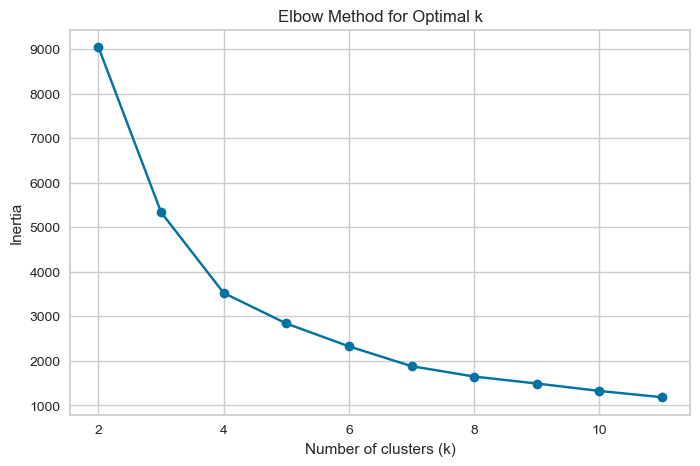

In [210]:
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

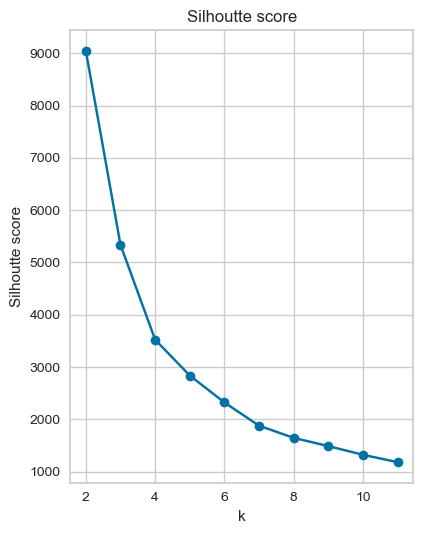

In [211]:
plt.subplot(1,2,2)
plt.plot(K_range, inertia, marker='o')
plt.title("Silhoutte score")
plt.xlabel("k")
plt.ylabel("Silhoutte score")
plt.tight_layout()
plt.show()

In [140]:
pip install yellowbrick

  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ----- --------------------------------- 41.0/282.6 kB 667.8 kB/s eta 0:00:01
   ---------------------------------------  276.5/282.6 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [144]:
from yellowbrick.cluster import KElbowVisualizer

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=42),
                 k=(2, 10))

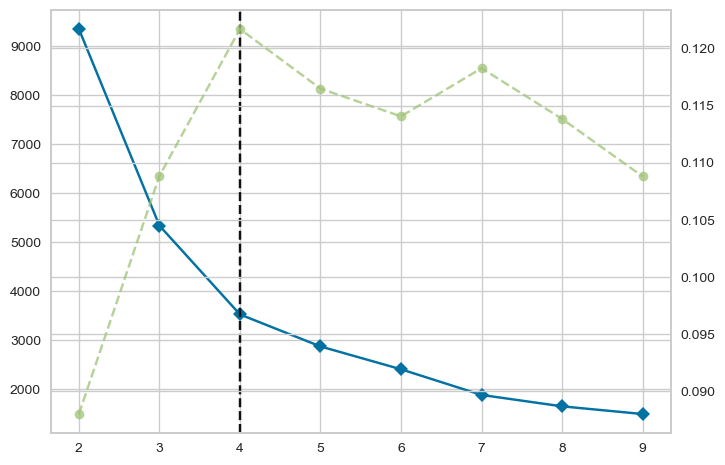

In [212]:
model = KMeans(random_state=42)
v= KElbowVisualizer(model, k=(2,10))
v.fit(X_scaled)

In [213]:
final_k = 4
final_model = KMeans(n_clusters=final_k,random_state=42)
final_model.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [214]:
rfm.head()

,CustomerID,recency_days,frequency,monetary
0,12346,326,2,5342.40
1,12347,2,7,431501.00
2,12348,75,4,82378.47
3,12349,19,1,176075.12
4,12350,310,1,48173.37


In [215]:
rfm['Cluster'] =final_model.labels_

In [216]:
rfm.head()

,CustomerID,recency_days,frequency,monetary,Cluster
0,12346,326,2,5342.40,1
1,12347,2,7,431501.00,0
2,12348,75,4,82378.47,0
3,12349,19,1,176075.12,0
4,12350,310,1,48173.37,1


In [217]:
cluster_profile = rfm.groupby('Cluster').agg({
    'recency_days':'mean',
    'frequency': 'mean',
    'monetary':'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'NumCustomers'}).round(1)

In [218]:
cluster_profile

,recency_days,frequency,monetary,NumCustomers
Cluster,,,,
0,43.4,4.2,195421.0,3023
1,248.9,1.8,69191.6,1077
2,1.7,153.5,12345024.6,6
3,11.8,25.3,1120633.6,266


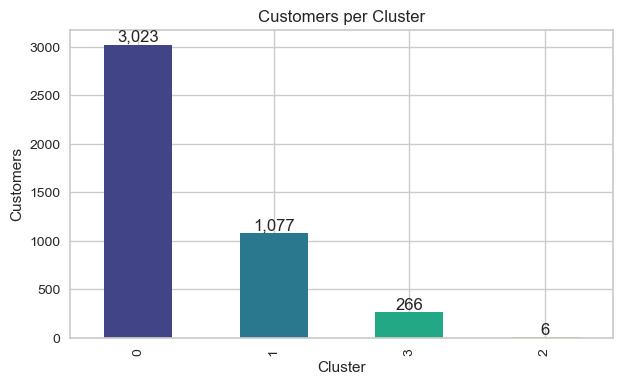

In [220]:
import seaborn as sns, matplotlib.pyplot as plt

sizes = rfm.groupby('Cluster')['CustomerID'].count().rename('NumCustomers').sort_values(ascending=False)
ax = sizes.plot(kind='bar', figsize=(7,4), color=sns.color_palette('viridis', len(sizes)))
plt.title('Customers per Cluster'); plt.ylabel('Customers'); plt.xlabel('Cluster')
for i, v in enumerate(sizes): plt.text(i, v, f'{v:,}', ha='center', va='bottom')
plt.show()


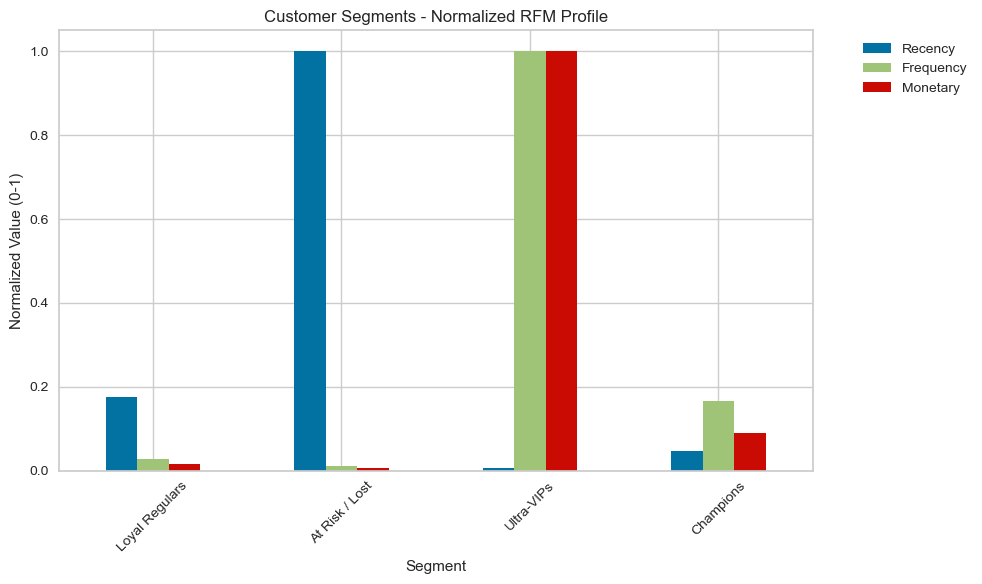

In [227]:
cluster_names = {
    0: "Loyal Regulars",
    1: "At Risk / Lost",
    2: "Ultra-VIPs",
    3: "Champions"
}

cluster_profile['Segment'] = cluster_profile.index.map(cluster_names)

df_plot = cluster_profile.copy()
df_plot[['recency_days', 'frequency', 'monetary']] = (
    df_plot[['recency_days', 'frequency', 'monetary']]
    .apply(lambda x: x / x.max())
)

df_plot.set_index('Segment')[['recency_days', 'frequency', 'monetary']].plot(
    kind='bar', figsize=(10, 6)
)

plt.title("Customer Segments - Normalized RFM Profile")
plt.ylabel("Normalized Value (0-1)")
plt.xticks(rotation=45)
plt.legend(["Recency", "Frequency", "Monetary"], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [228]:
Ultra_vips = rfm[rfm['Cluster'] ==2].copy()

In [229]:
Ultra_vips

,CustomerID,recency_days,frequency,monetary,Cluster,Segment
330,12748,1,224,11912482.34,2,VIP
1300,14096,4,34,12965429.74,2,VIP
1674,14606,1,128,7144512.92,2,VIP
1895,14911,1,248,15362741.47,2,VIP
2192,15311,1,118,6301150.63,2,VIP
4042,17841,2,169,20383830.65,2,VIP


In [230]:
Champions = rfm[rfm['Cluster'] ==3].copy()

In [231]:
Champions 

,CustomerID,recency_days,frequency,monetary,Cluster,Segment
55,12415,24,26,1944187.00,3,Loyal
69,12431,36,18,541433.70,3,Loyal
75,12437,2,19,517110.85,3,Loyal
100,12471,2,49,1351390.04,3,Loyal
101,12472,31,13,927503.20,3,Loyal
...,...,...,...,...,...,...
4305,18198,4,21,407944.69,3,Loyal
4324,18223,2,27,770695.42,3,Loyal
4326,18225,3,17,753284.92,3,Loyal
4330,18229,12,20,372558.19,3,Loyal


In [233]:
customer_cohort = Ecommerce[['CustomerID', 'CohortMonth']].drop_duplicates()


In [234]:
customer_cohort

,CustomerID,CohortMonth
0,17850,2010-12-01
312,13047,2010-12-01
508,12583,2010-12-01
759,13748,2010-12-01
787,15100,2010-12-01
...,...,...
406747,13436,2011-12-01
406759,15520,2011-12-01
406777,13298,2011-12-01
406779,14569,2011-12-01


In [235]:
cluster2_customers = Ultra_vips.merge(customer_cohort, on='CustomerID', how='left')


In [236]:
cluster2_customers

,CustomerID,recency_days,frequency,monetary,Cluster,Segment,CohortMonth
0,12748,1,224,11912482.34,2,VIP,2010-12-01
1,14096,4,34,12965429.74,2,VIP,2011-08-01
2,14606,1,128,7144512.92,2,VIP,2010-12-01
3,14911,1,248,15362741.47,2,VIP,2010-12-01
4,15311,1,118,6301150.63,2,VIP,2010-12-01
5,17841,2,169,20383830.65,2,VIP,2010-12-01


In [237]:
cluster2_customers.describe()

,recency_days,frequency,monetary,Cluster,CohortMonth
count,6.000000,6.000000,6.000000e+00,6.0,6
mean,1.666667,153.500000,1.234502e+07,2.0,2011-01-10 12:00:00
min,1.000000,34.000000,6.301151e+06,2.0,2010-12-01 00:00:00
25%,1.000000,120.500000,8.336505e+06,2.0,2010-12-01 00:00:00
50%,1.000000,148.500000,1.243896e+07,2.0,2010-12-01 00:00:00
75%,1.750000,210.250000,1.476341e+07,2.0,2010-12-01 00:00:00
max,4.000000,248.000000,2.038383e+07,2.0,2011-08-01 00:00:00
std,1.211060,77.886456,5.251186e+06,0.0,NaN
